<a href="https://colab.research.google.com/github/Vincenzo-Verma/infosys_python_internship/blob/main/Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# __Milestone 2__

### __General Tasks__
1. Plot Graphs.
2. Make Obesrvations.


### __Specific Tasks__

1. Convert `Residance_type` column to Rural/Urban ( 0 = rural, 1 = urban )
2. Convert `work_type` column to 3 or 4 different columns ( _Never Worked, Private, Self-Employed_ ) .
3. Convert `smoking_status` columns to 3.
4. Create New Variable to store the dataset for data model, and drop the `Residence_type`, `work_type` and `smoking_status` columns.


#### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

#### Imoprting dataset into a _`data_frame`_

In [24]:
data_frame = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [25]:
data_frame.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# General Tasks

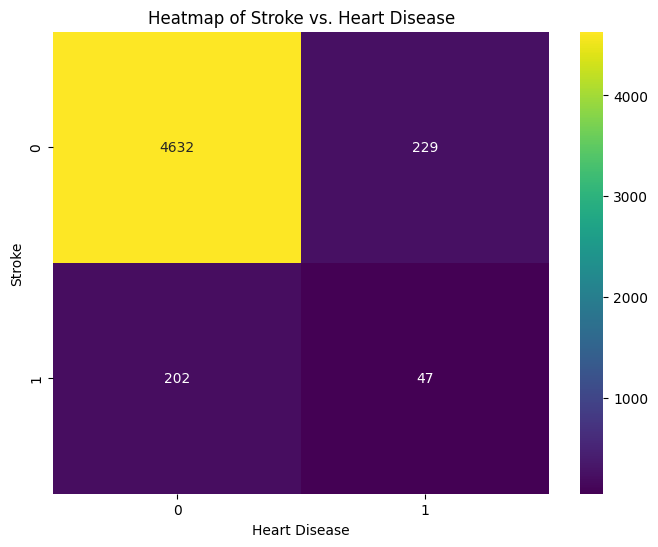

In [15]:
# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(pd.crosstab(data_frame['stroke'], data_frame['heart_disease']), annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Stroke vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Stroke')
plt.show()


In [9]:
# Create a DataFrame with the counts of males and females who had a stroke
stroke_gender = data_frame[data_frame['stroke'] == 1]['gender'].value_counts().reset_index()
stroke_gender.columns = ['gender', 'count']

# Create the pie chart using Plotly Express
fig = px.pie(stroke_gender, values='count', names='gender', title='Frequency of Males vs Females who got stroke.')

# Display the chart
fig.show()


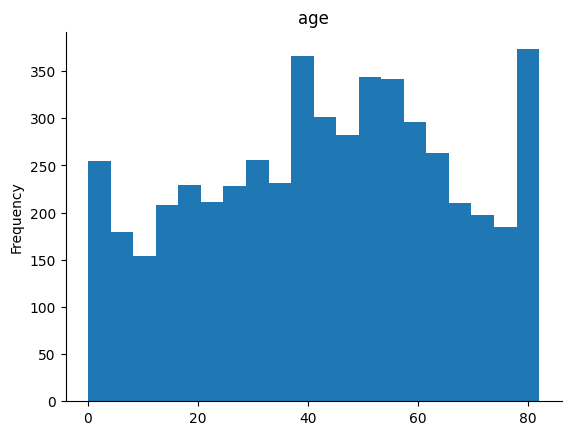

In [7]:
# @title age

data_frame['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

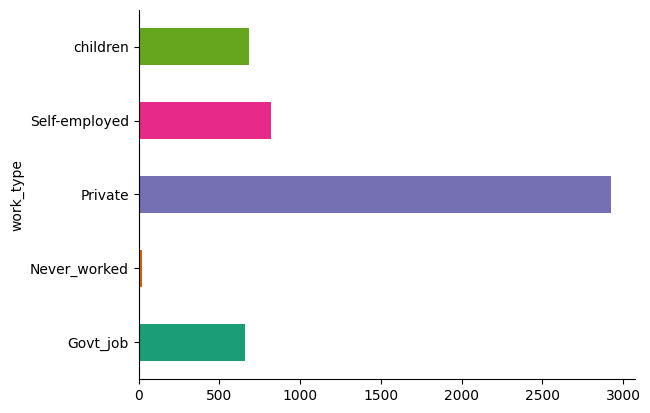

In [4]:
# @title work_type

from matplotlib import pyplot as plt
import seaborn as sns
data_frame.groupby('work_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Observations

* People with no heart disease history are less succeptible to get a stroke.

* People of age 40 and 80 have the highest chances of getting a stroke which is followed by people of the age 50 - 60.

* People working in Private jobs have highest number of stroke cases, this indicates the tough work culture is being followed in this industry.

* Females have a higher chance of getting a stroke than a males.


# Specific Tasks

In [35]:
data_frame_2 = data_frame.copy()
data_frame_2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [36]:
data_frame_2['Rural/Urban'] = data_frame_2['Residence_type'].map({'Rural': 0, 'Urban': 1})

#Display the updated dataframe to verify the change
data_frame_2.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rural/Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0


In [37]:
# Create new columns for each work type and initialize them to 0
data_frame_2['Never_Worked'] = 0
data_frame_2['Private'] = 0
data_frame_2['Self-Employed'] = 0

# Iterate through the 'work_type' column and update the corresponding new columns
for index, row in data_frame_2.iterrows():
    if row['work_type'] == 'Never_worked':
        data_frame_2.loc[index, 'Never_Worked'] = 1
    elif row['work_type'] == 'Private':
        data_frame_2.loc[index, 'Private'] = 1
    elif row['work_type'] == 'Self-employed':
        data_frame_2.loc[index, 'Self-Employed'] = 1

# Display the first few rows of the updated dataframe to verify the changes
data_frame_2.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rural/Urban,Never_Worked,Private,Self-Employed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1


In [38]:
# Convert smoking_status categories to numerical values
data_frame_2['smoking_status'] = data_frame_2['smoking_status'].replace({'never smoked': 0, 'formerly smoked': 1, 'smokes': 2})

data_frame_2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Rural/Urban,Never_Worked,Private,Self-Employed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,2,1,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1,0,0,0,1


In [40]:
# Create a new variable to store the dataset for the data model
data_model_df = data_frame_2.copy()

# Drop the specified columns
data_model_df = data_model_df.drop(['Residence_type', 'work_type', 'smoking_status'], axis=1)

data_model_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Rural/Urban,Never_Worked,Private,Self-Employed
0,9046,Male,67.0,0,1,Yes,228.69,36.6,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,202.21,NaN,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,105.92,32.5,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,171.23,34.4,1,1,0,1,0
4,1665,Female,79.0,1,0,Yes,174.12,24.0,1,0,0,0,1
